In [1]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC


In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
breast_cancer = load_breast_cancer(as_frame=True)
df_breast = breast_cancer.frame

In [8]:
X_bc = df_breast.drop("target", axis=1)
y_bc = df_breast["target"]

In [9]:
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size = 0.20, random_state = 0)

In [10]:
modelos_nb = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "MultinomialNB": MultinomialNB()
}

In [11]:
modelos_svm = {
    "SVM (Linear)": SVC(kernel='linear', C=1.0, random_state=0),
    "SVM (RGF)": SVC(kernel='rbf', C=1.0, random_state=0),
    "SVM (Poly)": SVC(kernel='poly', C=1.0, random_state=0)
}

In [12]:
resultados = {
    "Modelo":[],
    "Acuracia":[]
}

In [13]:
for nome_modelo, modelo in modelos_nb.items():
    #treinando o modelo
    modelo.fit(X_train_bc, y_train_bc)
    #predições
    y_preds_bc = modelo.predict(X_test_bc)
    acc = accuracy_score(y_test_bc, y_preds_bc)
    #armazenar no resultado
    resultados["Modelo"].append(nome_modelo)
    resultados["Acuracia"].append(acc)

    #Gerando gráfico de comparação entre os modelos
    print(f"\n=== {nome_modelo} ===")
    print(f"Acurácia: {acc:.4f}")
    print(f"Relatório de Classificação")
    print(classification_report(y_test_bc, y_preds_bc, zero_division=0))
    print("Matriz de Confusão")
    print(confusion_matrix(y_test_bc, y_preds_bc))

#código do 
for nome_modelo, modelo in modelos_svm.items():
    #trinando o modelo
    modelo.fit(X_train_bc, y_train_bc)
    #predições
    y_preds_bc = modelo.predict(X_test_bc)
    acc = accuracy_score(y_test_bc, y_preds_bc)
    #armazenar no resultado
    resultados["Modelo"].append(nome_modelo)
    resultados["Acuracia"].append(acc)

    #Gerando gráfico de comparação entre os modelos
    print(f"\n=== {nome_modelo} ===")
    print(f"Acurácia: {acc:.4f}")
    print(f"Relatório de Classificação")
    print(classification_report(y_test_bc, y_preds_bc, zero_division=0))
    print("Matriz de Confusão")
    print(confusion_matrix(y_test_bc, y_preds_bc))


=== GaussianNB ===
Acurácia: 0.9298
Relatório de Classificação
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Matriz de Confusão
[[43  4]
 [ 4 63]]

=== BernoulliNB ===
Acurácia: 0.5877
Relatório de Classificação
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.59      1.00      0.74        67

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

Matriz de Confusão
[[ 0 47]
 [ 0 67]]

=== MultinomialNB ===
Acurácia: 0.8947
Relatório de Classificação
              precision    recall  f1-score   support

           0       

In [14]:
df_resultados = pd.DataFrame(resultados)

In [15]:
print("")

In [16]:
df_resultados_ = df_resultados[df_resultados["Acuracia"] >=0.90].copy()

In [17]:
df_resultados_.reset_index(drop = True, inplace = True)

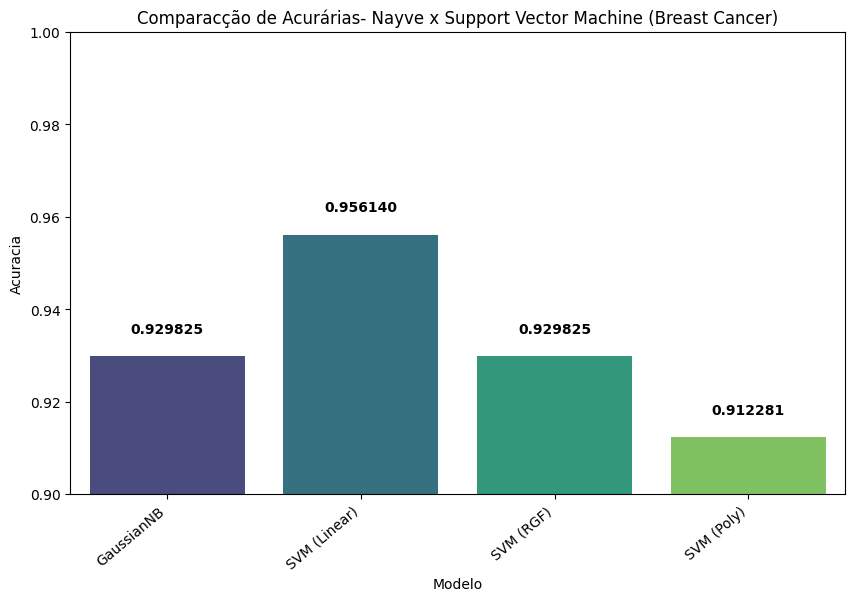

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(
    data =df_resultados_,
    x= "Modelo",
    y= "Acuracia",
    hue= "Modelo",
    palette = "viridis",
    legend = False
)
plt.title("Comparacção de Acurárias- Nayve x Support Vector Machine (Breast Cancer)")
for i, v in enumerate(df_resultados_["Acuracia"]):
    plt.text(i, v+ 0.005, f"{v:3f}", ha = 'center', fontweight = 'bold')

plt.xticks(rotation=40, ha='right')
plt.ylim(0.90, 1.0)
plt.show()

In [ ]:
logistic_bc = LogistiRegression(color='

### Regressão

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing  
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  